# Analyzing Metric resistance to Random and Brute Force models

In this experiment, we compared the performance of Gemma, a brute force model, and a random model. The random model was tasked with extracting sentences at random from the transcript, while the brute force model considered every possible sentence from the transcript. The results, as illustrated in the graph, reveal that the brute force model suffers from significant negative impacts due to excessive generation of responses, which adversely affects its performance. In contrast, Gemma achieved the highest scores for the transcripts of two comedians, exceeding 60%.

#### Imports

In [19]:
import sys
import pandas as pd
sys.path.append("..")
import seaborn as sns
import nltk
from thefuzz import fuzz
import matplotlib.pyplot as plt

# from humor.bipartite_metric import bipartite_metric

In [20]:
ground_truth = pd.read_csv('/home/ada/humor/data/stand_up_dataset/standup_data.csv')
model = pd.read_csv('/home/ada/humor/data/stand_up_dataset/gemma_answers.csv')
transcript = pd.read_csv('/home/ada/humor/data/stand_up_dataset/standup_transcripts.csv')
random_model = pd.read_csv("/home/ada/humor/data/stand_up_dataset/random_gemma_quotes.csv")

In [21]:
# Create brute force dataframe
brute_sentences = []
for i in range(len(transcript['comedian'])):
    comedian = transcript['comedian'][i]
    trans = transcript['transcript'][i]
    sentences = nltk.sent_tokenize(trans)
    for sentence in sentences:
        brute_sentences.append({'comedian': comedian, 'sentence': sentence})

brute_model = pd.DataFrame(brute_sentences)

#### Experiment

In [25]:
brute = bipartite_metric(brute_model, ground_truth)
print("Brute Model:", brute.select_dtypes(include='number').mean())

              comedian      score
0             Ali_Wong  68.113095
1           Ali_Wong_2  64.980952
2           Ali_Wong_3  61.378571
3     Anthony_Jeselnik  56.935374
4   Anthony_Jeselnik_2  39.847222
5   Anthony_Jeselnik_3  54.395833
6      Chelsea_Peretti  60.100000
7    Chelsea_Peretti_2  48.098485
8    Chelsea_Peretti_3  58.377778
9        Donald_Glover  45.583333
10     Donald_Glover_2  54.489583
11     Donald_Glover_3  48.450000
12        Hasan_Minhaj  50.373958
13      Hasan_Minhaj_2  49.883333
14      Hasan_Minhaj_3  46.566234
15    Iliza_Shlesinger  56.672222
16  Iliza_Shlesinger_2  45.559524
17  Iliza_Shlesinger_3  46.809524
18        Jim_Gaffigan  58.172222
19      Jim_Gaffigan_2  63.333333
20      Jim_Gaffigan_3  67.500000
21          Jimmy_Yang  65.141667
22        Jimmy_Yang_2  56.486667
23        Jimmy_Yang_3  71.175926
24            Joe_List  59.462500
25          Joe_List_2  58.155303
26          Joe_List_3  46.355159
27        John_Mulaney  64.047619
28      John_M

In [23]:
brute = bipartite_metric(brute_model, ground_truth)
print("Brute Model:", brute.select_dtypes(include='number').mean())

gemma_metric = bipartite_metric(model, ground_truth)
print("Gemma Model:", gemma_metric.select_dtypes(include='number').mean())

random = bipartite_metric(random_model, ground_truth)
print("Random Model:", random.select_dtypes(include='number').mean())

              comedian      score
0             Ali_Wong  68.113095
1           Ali_Wong_2  64.980952
2           Ali_Wong_3  61.378571
3     Anthony_Jeselnik  56.935374
4   Anthony_Jeselnik_2  39.847222
5   Anthony_Jeselnik_3  54.395833
6      Chelsea_Peretti  60.100000
7    Chelsea_Peretti_2  48.098485
8    Chelsea_Peretti_3  58.377778
9        Donald_Glover  45.583333
10     Donald_Glover_2  54.489583
11     Donald_Glover_3  48.450000
12        Hasan_Minhaj  50.373958
13      Hasan_Minhaj_2  49.883333
14      Hasan_Minhaj_3  46.566234
15    Iliza_Shlesinger  56.672222
16  Iliza_Shlesinger_2  45.559524
17  Iliza_Shlesinger_3  46.809524
18        Jim_Gaffigan  58.172222
19      Jim_Gaffigan_2  63.333333
20      Jim_Gaffigan_3  67.500000
21          Jimmy_Yang  65.141667
22        Jimmy_Yang_2  56.486667
23        Jimmy_Yang_3  71.175926
24            Joe_List  59.462500
25          Joe_List_2  58.155303
26          Joe_List_3  46.355159
27        John_Mulaney  64.047619
28      John_M

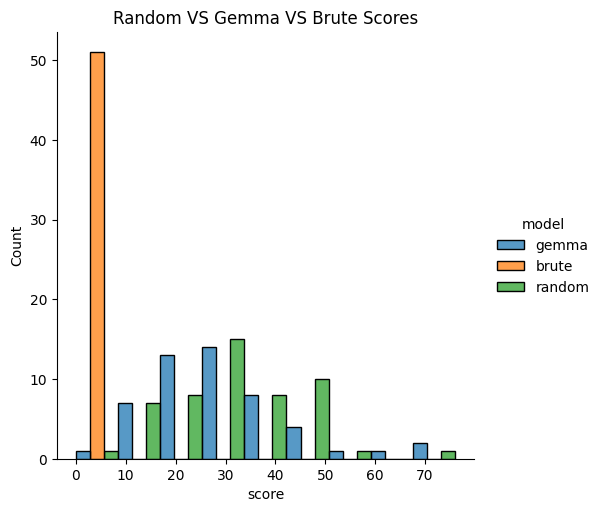

In [24]:
gemma = gemma_metric.assign(model="gemma") 
brute = brute.assign(model="brute") 
random = random.assign(model="random") 
df = pd.concat([gemma, brute, random]).reset_index(drop=True)
sns.displot(df, x="score", hue="model", kind="hist", shrink=1, multiple="dodge")
plt.title("Random VS Gemma VS Brute Scores")
plt.show()